In [52]:
# utility libs: computations, nice plots

import numpy                   as np
import matplotlib              as mpl
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plb
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib.colors       import to_hex

# sci-kit learn

from   sklearn                 import datasets
from   sklearn.manifold        import Isomap
from   sklearn.cluster         import KMeans
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.metrics         import confusion_matrix, accuracy_score
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LogisticRegression


In [2]:
# Use LaTeX, set matplotlib plots resolution to decent

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"]
})

%matplotlib inline 
plt.rcParams['figure.dpi'] = 300

In [3]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.keys())

(1797, 8, 8)
(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


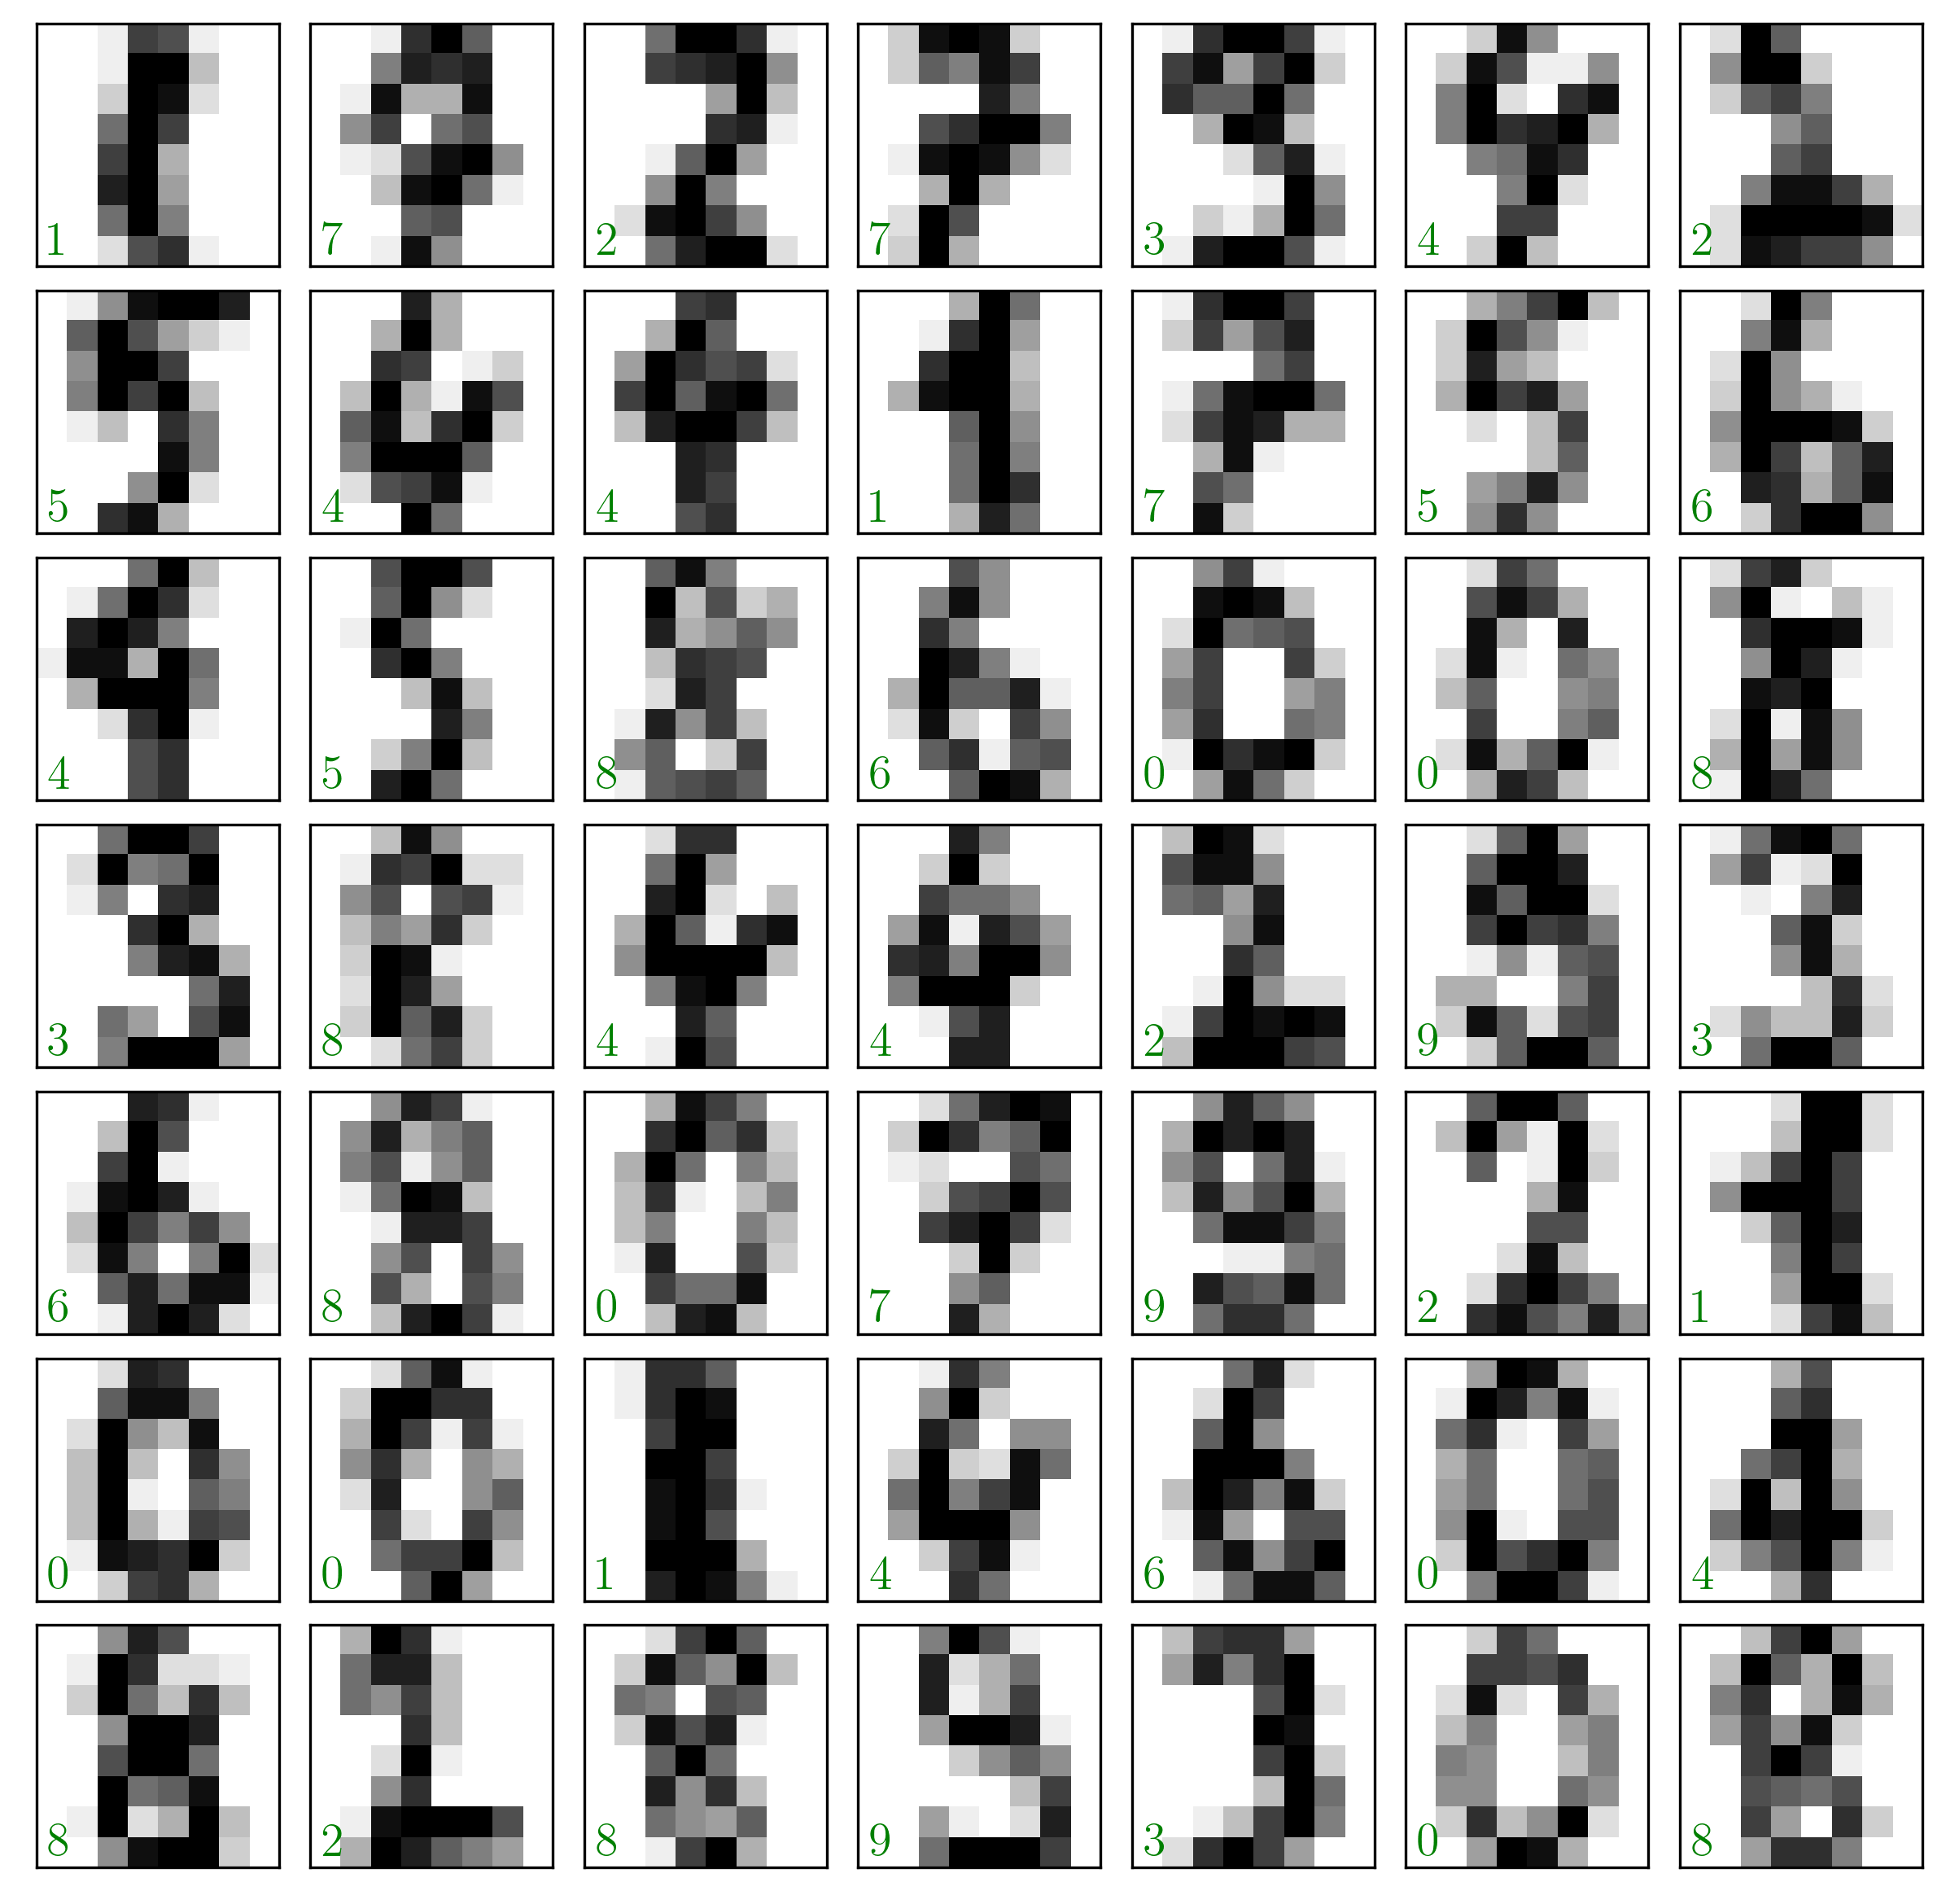

In [4]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0], 100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [5]:
# reduction of the dimensionality of the dataset: from D=64 to D=2

x         = digits.data
x_colors  = digits.target
x_names   = digits.target_names

embedding = Isomap(n_components=2)

x_fit     = embedding.fit_transform(x)

print(x.shape)
print(x_fit.shape)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 64)
(1797, 2)


"\n# old method: this works just fine but I want a discrete colormap\ncbar = ax.scatter( x_fit[:,0], x_fit[:,1], marker='d', s=10, cmap='viridis', c=x_colors)\ncbar = plt.colorbar(cbar)\ncticks = [[],[]]\nfor i in range(10):\n    cticks[0].append(i)\n    cticks[1].append(str(i))\ncbar.set_ticks(cticks[0])\ncbar.set_ticklabels(cticks[1])\n"

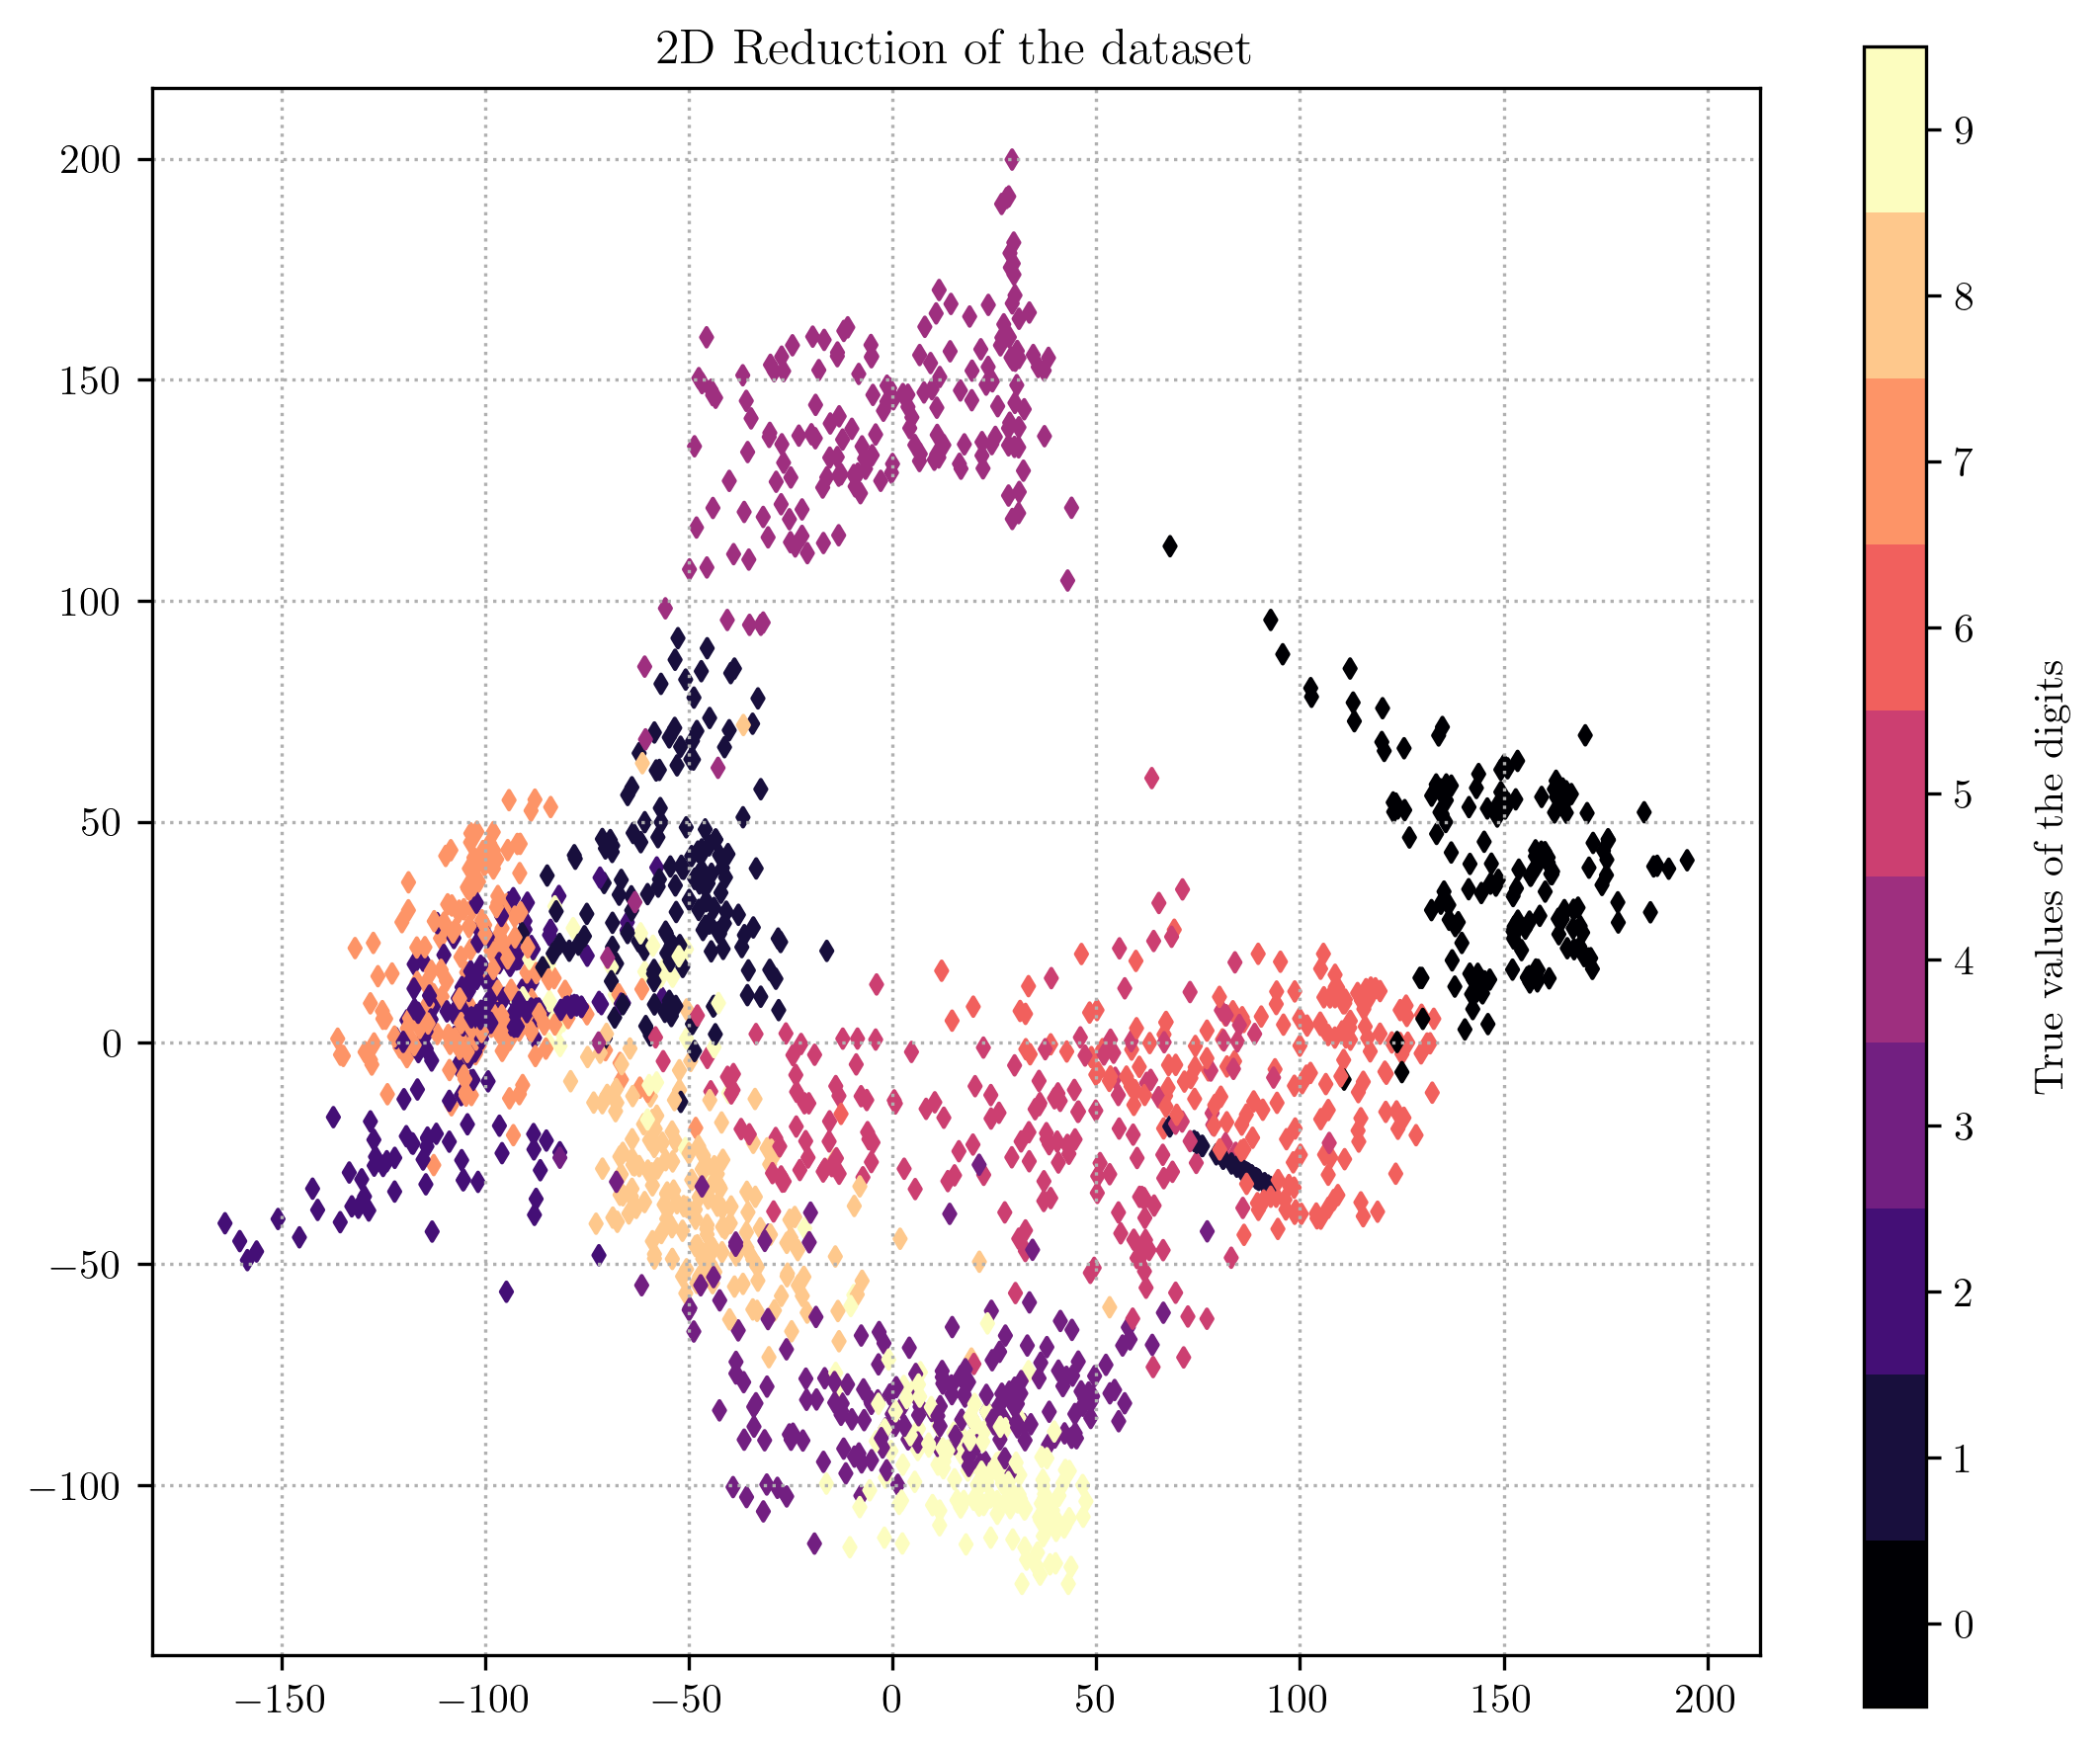

In [6]:
# Plot the D=2 reduction of the D=64 dataset
# Note: to emphasize clusters, the TRUE values of the digits have been used

fig , ax = plt.subplots(figsize=(7,7))

# let'saa build a discrete colormap
cmap_1   = mpl.cm.magma
cmapl_1  = [cmap_1(i) for i in range(cmap_1.N)]
cmap_1   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmapl_1, cmap_1.N)
bounds_1 = np.linspace(-0.5, 9.5, 11)
ticks_1  = np.linspace(0., 9., 10)
norm_1   = mpl.colors.BoundaryNorm(bounds_1, cmap_1.N)

leplot   = ax.scatter( x_fit[:,0], x_fit[:,1], c=x_colors, marker='d', s=10, cmap=cmap_1, norm=norm_1)

cmapax   = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cbar     = mpl.colorbar.ColorbarBase(cmapax, cmap=cmap_1, norm=norm_1, spacing='proportional', ticks=ticks_1, boundaries=bounds_1, format='%1i') # %.1f

ax.set_title('2D Reduction of the dataset')
cmapax.set_ylabel('\n' + 'True values of the digits') # 'A discrete custom colorbar'

ax.grid(ls=':')

# fig.savefig('./L13_images/L13_2D_digits_true.pdf', bbox_inches='tight')

'''
# old method: this works just fine but I want a discrete colormap
cbar = ax.scatter( x_fit[:,0], x_fit[:,1], marker='d', s=10, cmap='viridis', c=x_colors)
cbar = plt.colorbar(cbar)
cticks = [[],[]]
for i in range(10):
    cticks[0].append(i)
    cticks[1].append(str(i))
cbar.set_ticks(cticks[0])
cbar.set_ticklabels(cticks[1])
'''

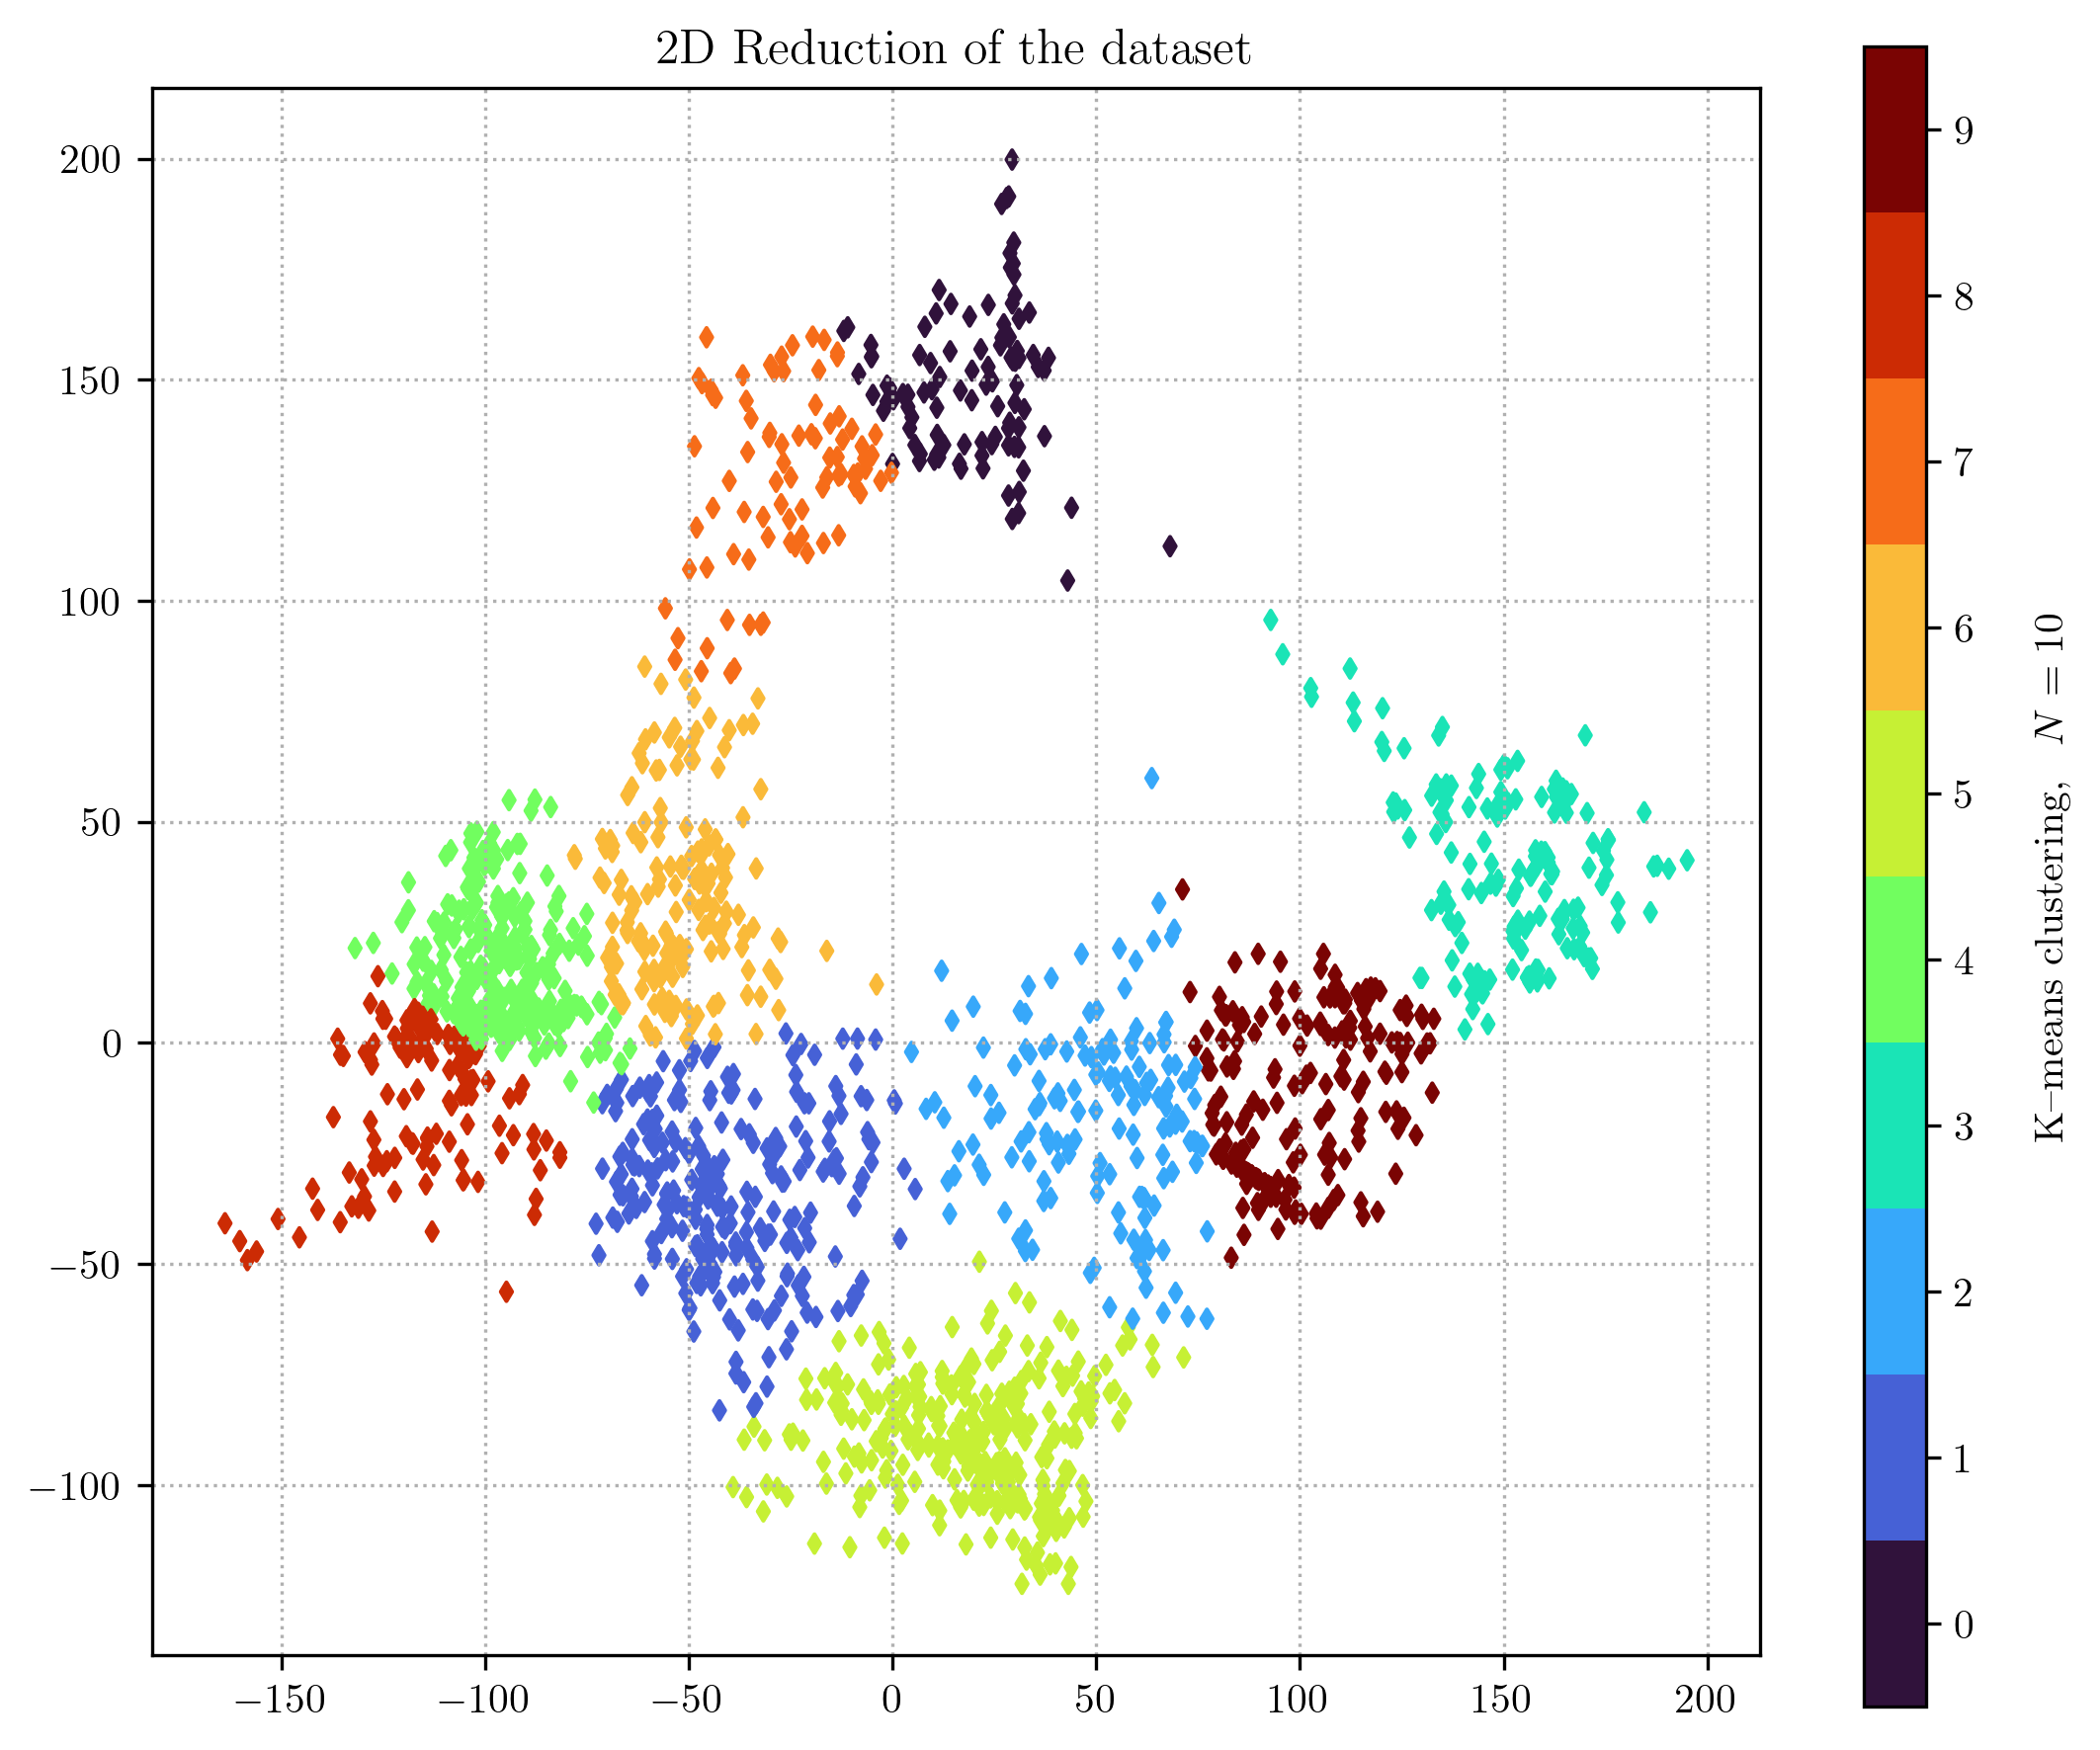

In [7]:
# Plot the D=2 reduction of the D=64 dataset
# Note: clusters found with K-means predictor!

fig , ax = plt.subplots(figsize=(7,7))

k_means  = KMeans(n_clusters=10)
k_means.fit(x_fit)
y_pred   = k_means.predict(x_fit)

# let'saa build a different discrete colormap (so we're not confused)
cmap_2   = mpl.cm.turbo # gnuplot
cmapl_2  = [cmap_2(i) for i in range(cmap_2.N)]
cmap_2   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap 2', cmapl_2, cmap_2.N)
bounds_2 = np.linspace(-0.5, 9.5, 11)
ticks_2  = np.linspace(0., 9., 10)
norm_2   = mpl.colors.BoundaryNorm(bounds_2, cmap_2.N)

leplot   = ax.scatter(x_fit[:,0], x_fit[:,1], c=y_pred, marker='d', s=10, cmap=cmap_2, norm=norm_2)

cmapax   = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cbar     = mpl.colorbar.ColorbarBase(cmapax, cmap=cmap_2, norm=norm_2, spacing='proportional', ticks=ticks_2, boundaries=bounds_2, format='%1i') # %.1f

ax.set_title('2D Reduction of the dataset')
cmapax.set_ylabel('\n' + r'K--means clustering, \, $N=10$')

ax.grid(ls=':')

# fig.savefig('./L13_images/L13_2D_digits_kmeans.pdf', bbox_inches='tight')


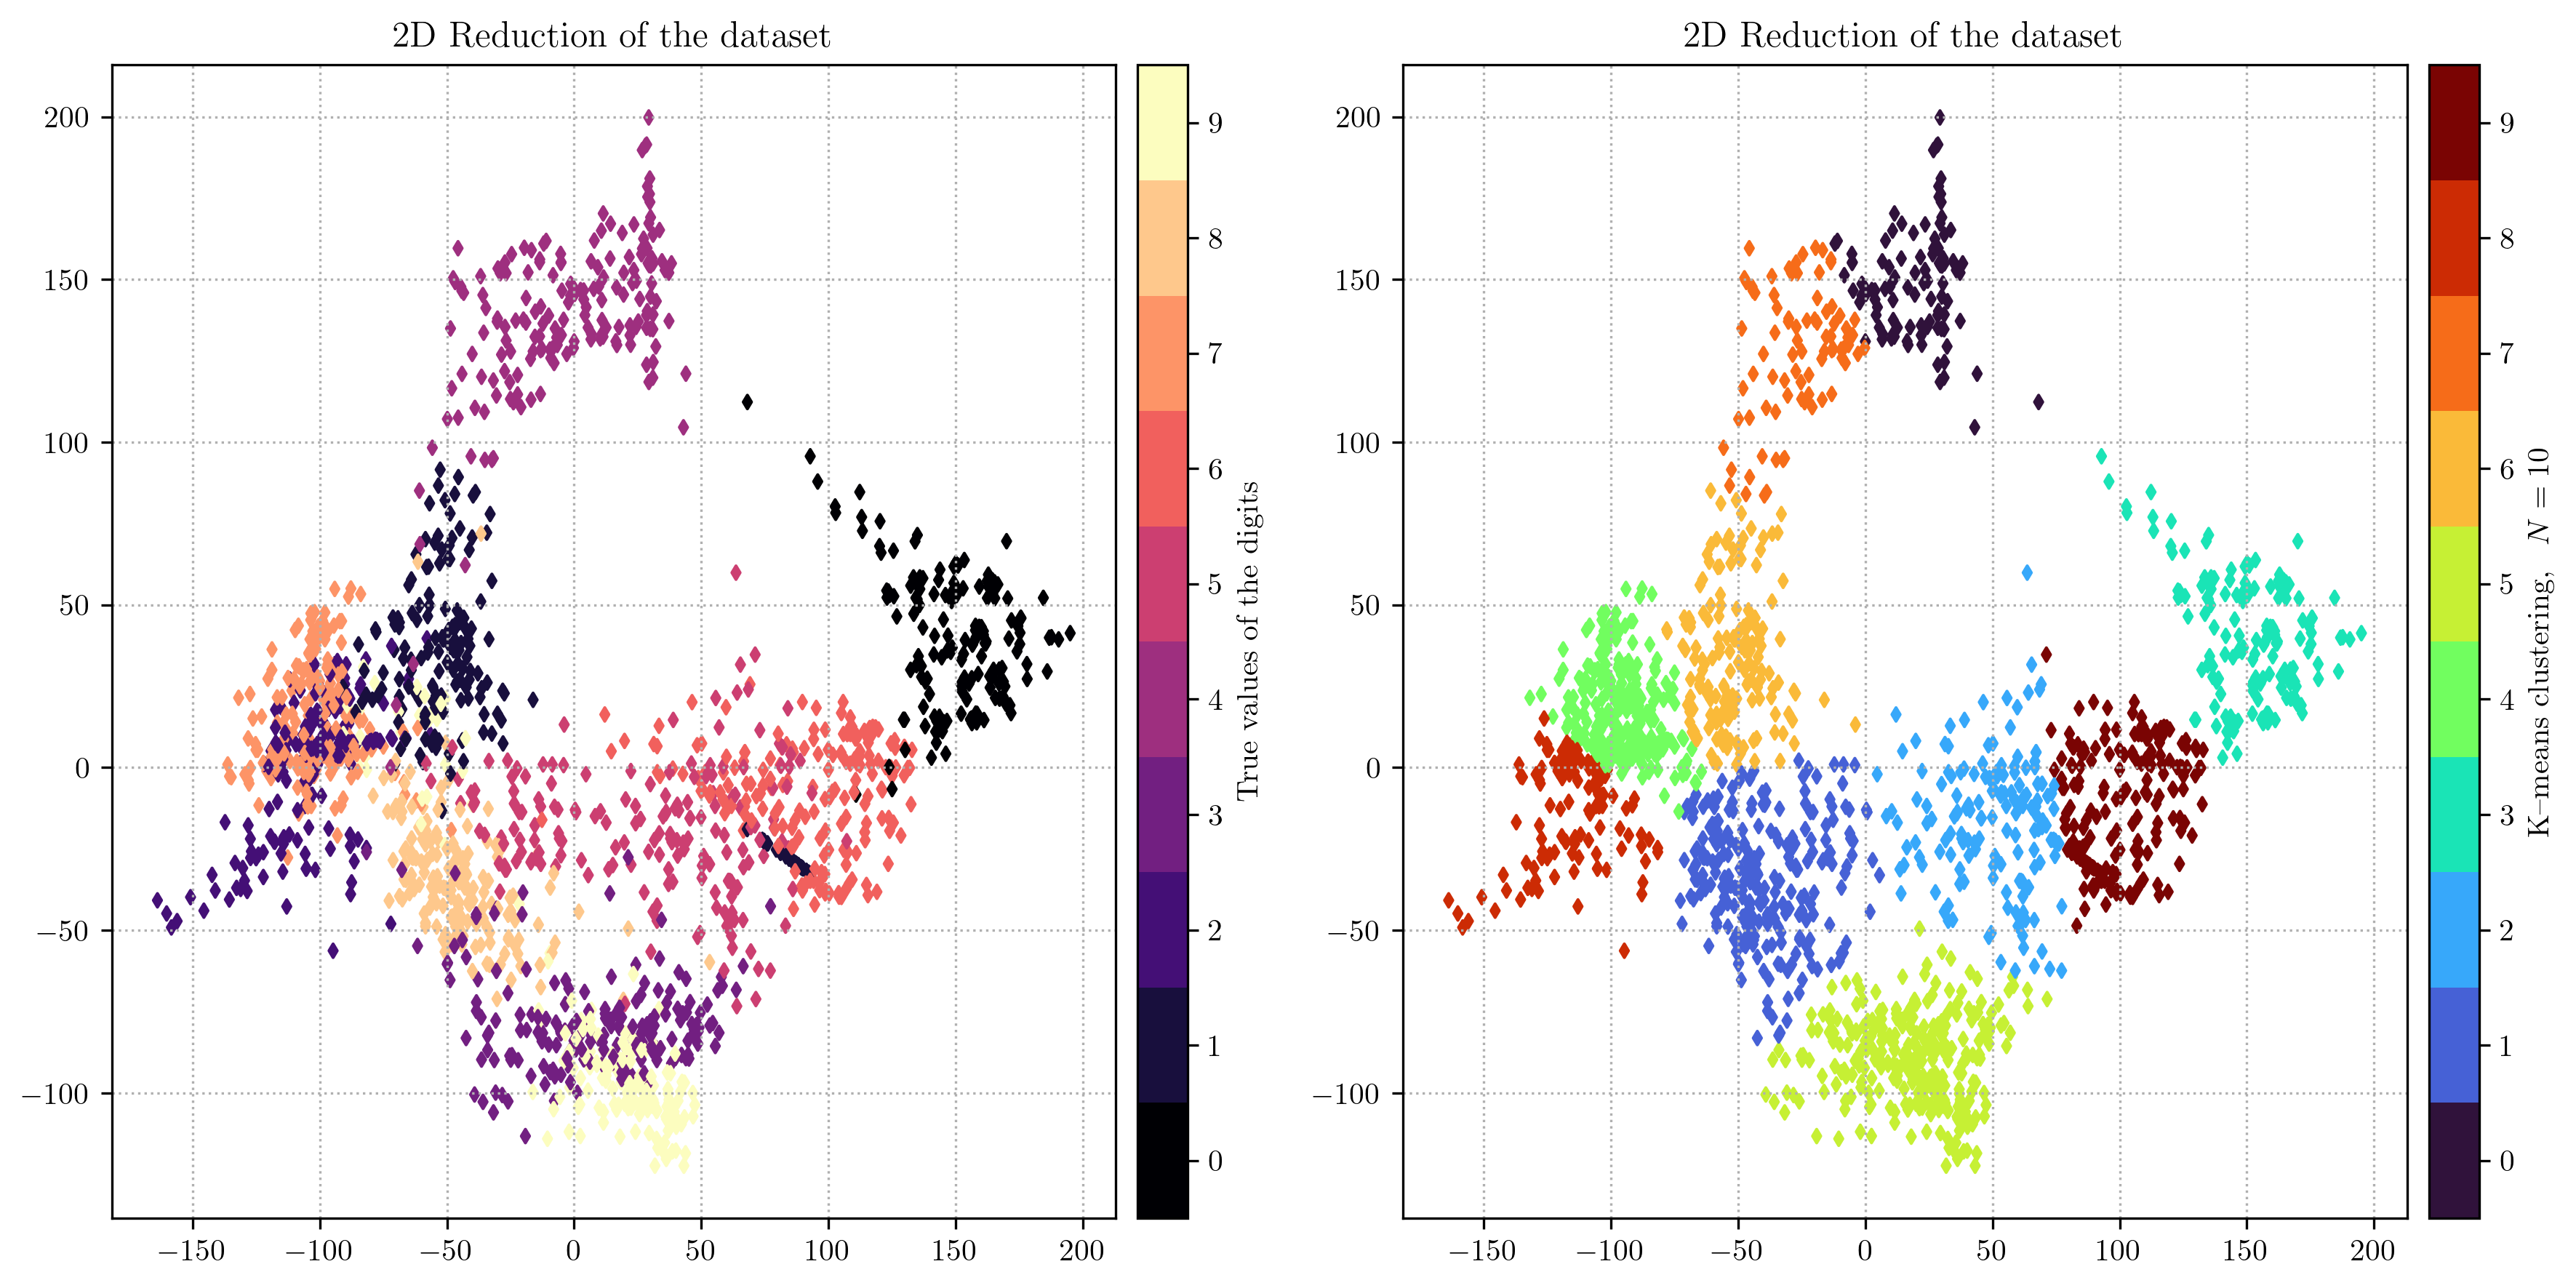

In [8]:
# Plot the D=2 reduction of the D=64 dataset
# Compare clusters: true values (LEFT) / K-means clustering predictor (RIGHT)

# colormap: true values
cmap_1   = mpl.cm.magma
cmapl_1  = [cmap_1(i) for i in range(cmap_1.N)]
cmap_1   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmapl_1, cmap_1.N)
bounds_1 = np.linspace(-0.5, 9.5, 11)
ticks_1  = np.linspace(0., 9., 10)
norm_1   = mpl.colors.BoundaryNorm(bounds_1, cmap_1.N)

# colormap: K-means clustering 
cmap_2   = mpl.cm.turbo
cmapl_2  = [cmap_2(i) for i in range(cmap_2.N)]
cmap_2   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap 2', cmapl_2, cmap_2.N)
bounds_2 = np.linspace(-0.5, 9.5, 11)
ticks_2  = np.linspace(0., 9., 10)
norm_2   = mpl.colors.BoundaryNorm(bounds_2, cmap_2.N)



fig      = plt.figure(figsize=(14,7))

ax_1     = fig.add_subplot(121)
leplot_1 = ax_1.scatter( x_fit[:,0], x_fit[:,1], c=x_colors, marker='d', s=10, cmap=cmap_1, norm=norm_1)

divider  = make_axes_locatable(ax_1)
cmapax_1 = divider.append_axes('right', size='5%', pad=0.10)
cbar_1   = mpl.colorbar.ColorbarBase(cmapax_1, cmap=cmap_1, norm=norm_1, spacing='proportional', ticks=ticks_1, boundaries=bounds_1, format='%1i') # %.1f

ax_1.set_title('2D Reduction of the dataset')
cmapax_1.set_ylabel('True values of the digits') # 'A discrete custom colorbar'

ax_1.grid(ls=':')

ax_2     = fig.add_subplot(122)
leplot_2 = ax_2.scatter(x_fit[:,0], x_fit[:,1], c=y_pred, marker='d', s=10, cmap=cmap_2, norm=norm_2)

divider  = make_axes_locatable(ax_2)
cmapax_2 = divider.append_axes('right', size='5%', pad=0.10)
cbar_2   = mpl.colorbar.ColorbarBase(cmapax_2, cmap=cmap_2, norm=norm_2, spacing='proportional', ticks=ticks_2, boundaries=bounds_2, format='%1i') # %.1f

ax_2.set_title('2D Reduction of the dataset')
cmapax_2.set_ylabel(r'K--means clustering, \, $N=10$')

ax_2.grid(ls=':')

# fig.savefig('./L13_images/L13_2D_digits_comparison.pdf', bbox_inches='tight')


In [28]:
# Nearest Neighbour Classifier -- split the dataset

x_train, x_test, y_train, y_test = train_test_split(x, x_colors, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))

print() 

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


[[150   0   0   0   0   0   0   0   0   0]
 [  0 142   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 137   0   0   0   0   0]
 [  0   0   0   0   0 145   0   0   0   0]
 [  0   0   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 137   0   0]
 [  0   0   0   0   0   0   0   0 137   0]
 [  0   0   0   0   0   0   0   0   0 146]]

[[28  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  2  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  1  1  0  0  1 31]]


In [29]:
# Logistic Regression Classifier -- split the dataset

x_train, x_test, y_train, y_test = train_test_split(x, x_colors, test_size=0.2)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print() 

y_pred = clf.predict(x_test)
LogRegr_Confusion_Matrix_test = confusion_matrix(y_test, y_pred)
print( LogRegr_Confusion_Matrix_test )
print()

acc = accuracy_score(y_test, y_pred)   
print('Percentage of correct predictions = {:.2f}%'.format(acc * 100) )
print('Meaning a total of  {:d}  errors out of  {:d}  predictions'.format( np.sum(y_pred != y_test) , len(y_test)) )

# identical to the two lines above:
# right = np.sum( y_test == y_pred ) / len(y_test) 
# print('Percentage of correct predictions = {:.2f}%'.format(right * 100) )


# Tell me how many times each 

N = len(LogRegr_Confusion_Matrix_test[:,0])
for i in range(N):
    for j in range(N):
        if i != j:
            num = LogRegr_Confusion_Matrix_test[i,j]
            if num > 0:
                print("True digit  {:d}  confused with  {:d}  a total of  {:d}  times".format(i,j,num))

[[141   0   0   0   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0   0   0   0]
 [  0   0 136   0   0   0   0   0   0   0]
 [  0   0   0 148   0   0   0   0   0   0]
 [  0   0   0   0 141   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0]
 [  0   0   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 148]]

[[36  0  0  0  0  1  0  0  0  0]
 [ 0 41  0  0  1  0  0  0  0  0]
 [ 0  1 39  0  0  0  0  0  1  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 1  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  1]
 [ 0  1  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  1  0  0 27  0  0]
 [ 0  1  1  0  0  1  0  0 33  0]
 [ 0  0  0  0  0  1  0  1  0 30]]

Percentage of correct predictions = 96.11%
Meaning a total of  14  errors out of  360  predictions
True digit  0  confused with  5  a total of  1  times
True digit  1  confused with  4  a total of  1  times
True digit  2  confused with 

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# from IPython.display import IFrame
# IFrame("./L13_images/L13_2D_digits_true.pdf", width=700, height=700)

True digit  2  confused with  1
True digit  1  confused with  4
True digit  8  confused with  2
True digit  9  confused with  7
True digit  5  confused with  9
True digit  6  confused with  5
True digit  0  confused with  5
True digit  6  confused with  1
True digit  9  confused with  5
True digit  8  confused with  5
True digit  8  confused with  1
True digit  2  confused with  8
True digit  7  confused with  4
True digit  4  confused with  0
[1 4 2 7 9 5 5 1 5 5 1 8 4 0]


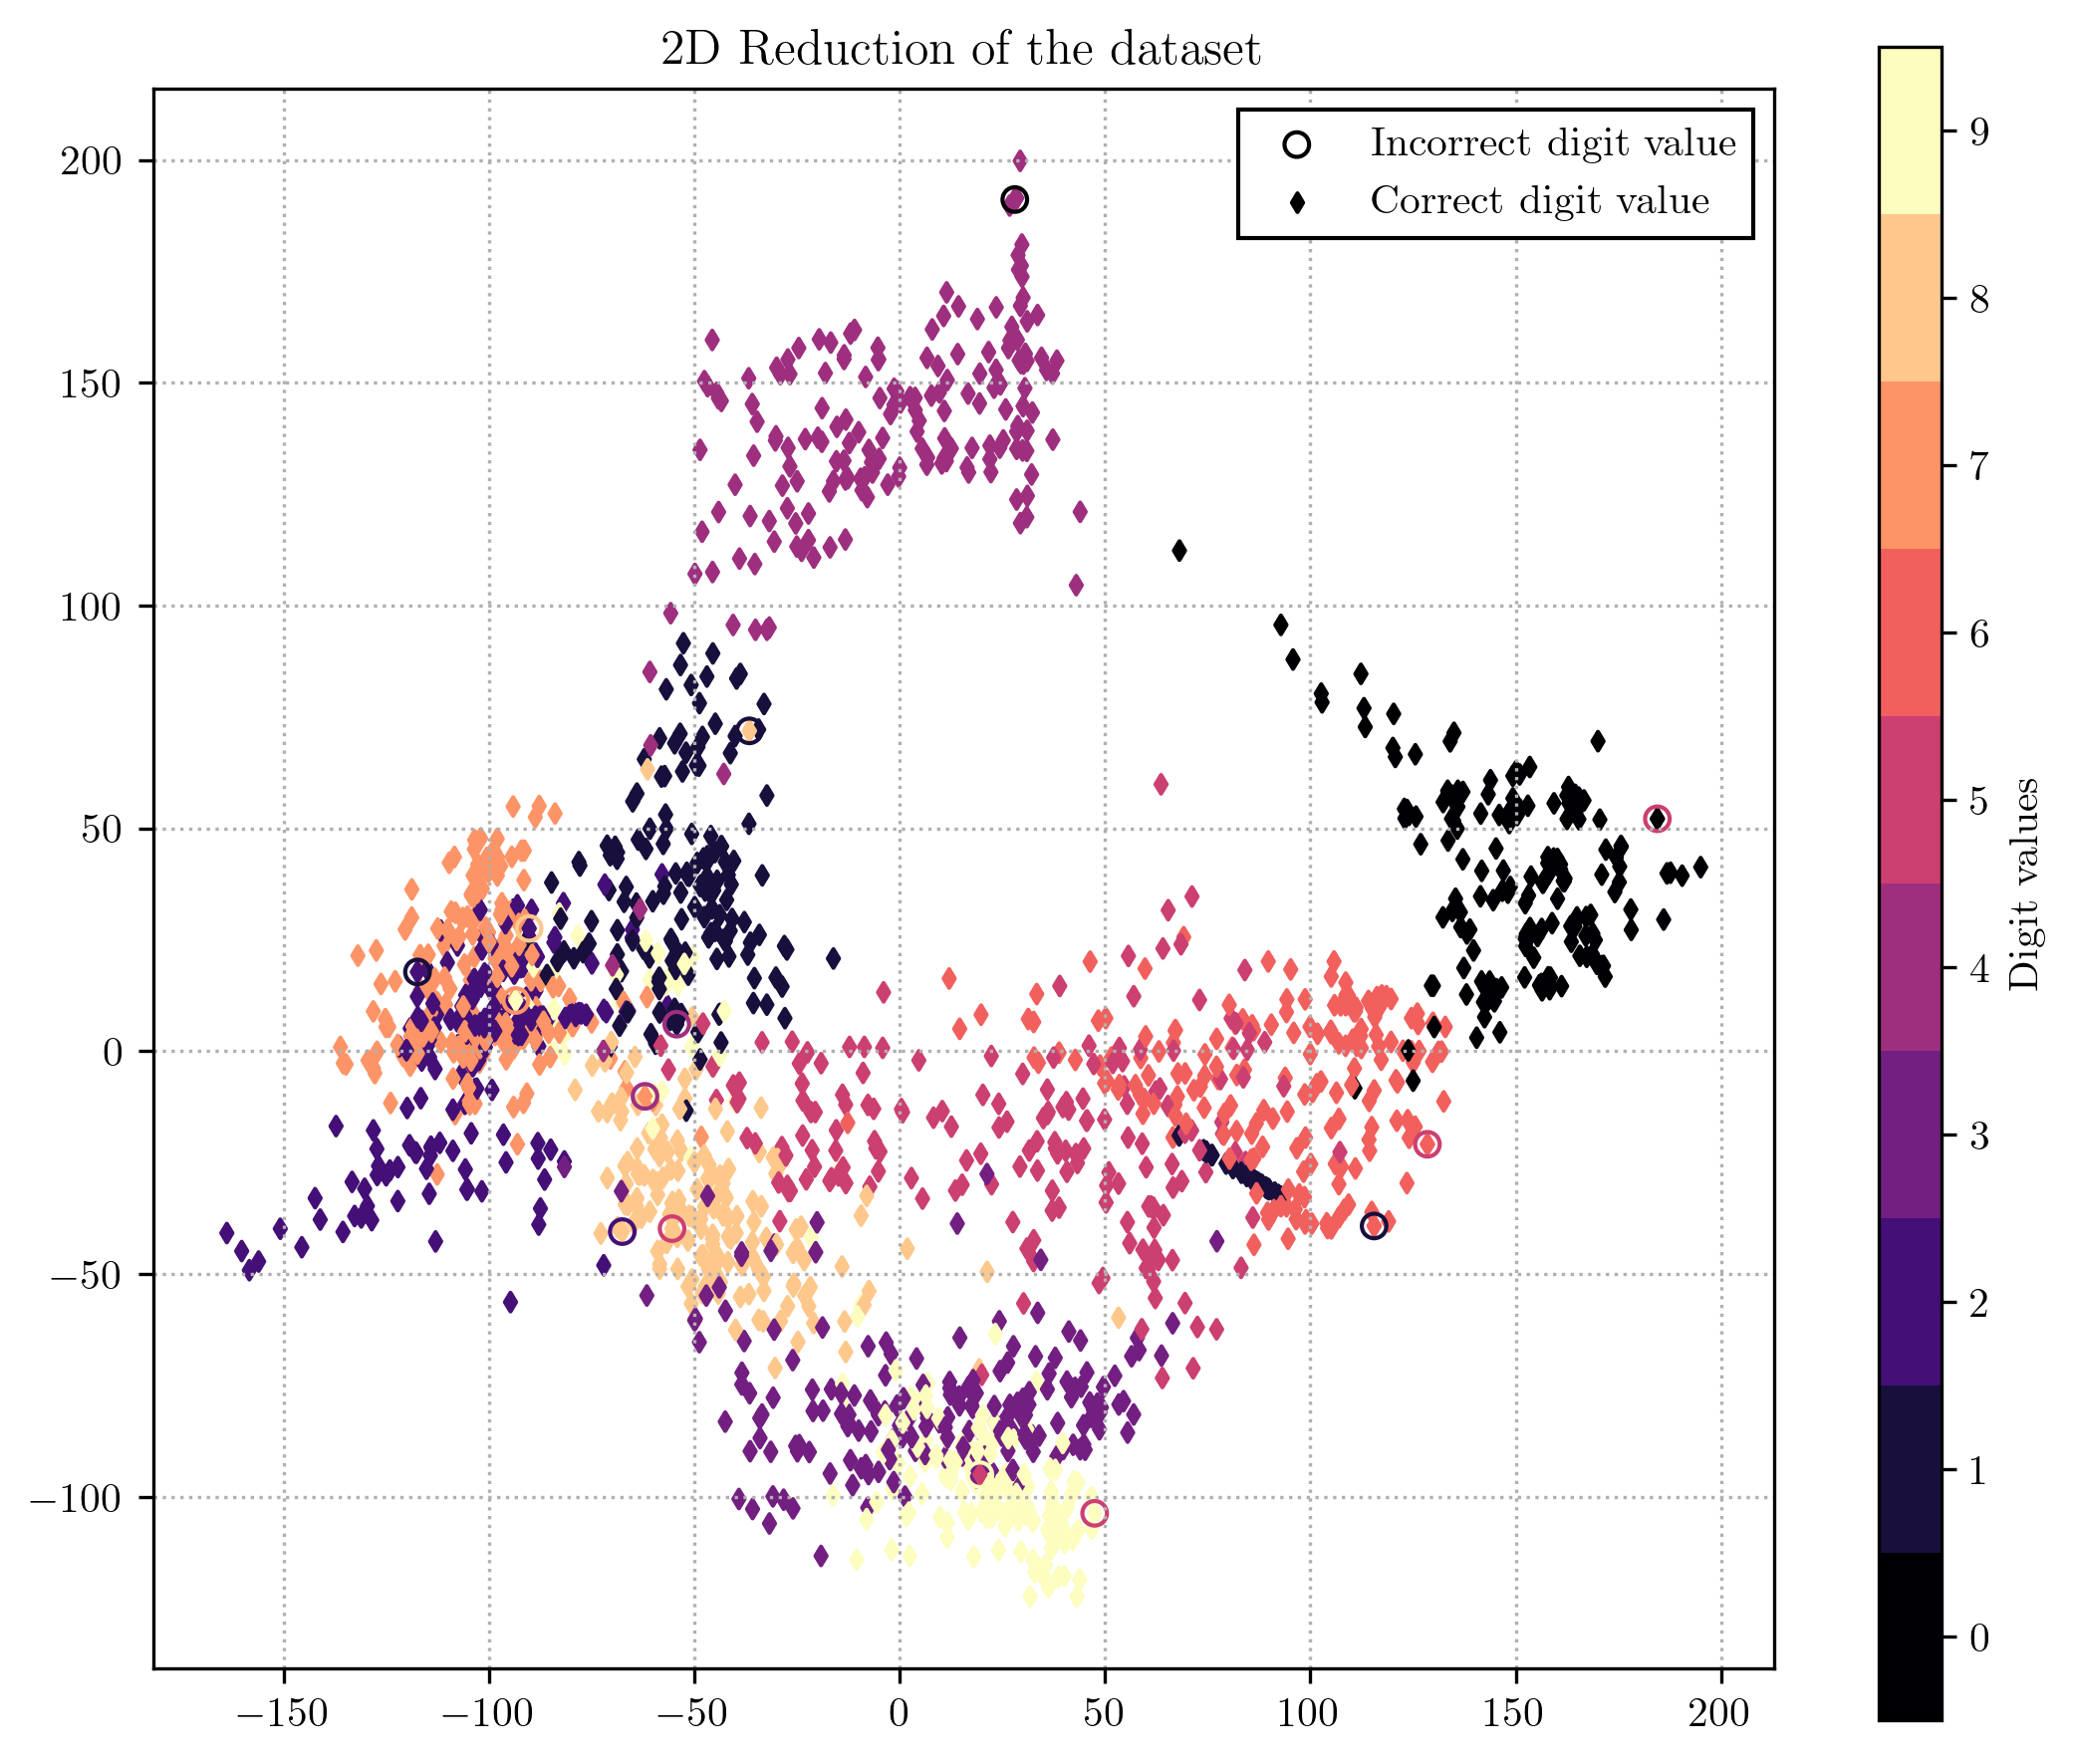

In [165]:
# Let's find exactly which points were wrong:

# Plot the D=2 reduction of the D=64 dataset
# Note: to emphasize clusters, the TRUE values of the digits have been used

fig , ax = plt.subplots(figsize=(7,7))

# let'saa build a discrete colormap
cmap_1   = mpl.cm.magma
cmapl_1  = [cmap_1(i) for i in range(cmap_1.N)]
cmap_1   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmapl_1, cmap_1.N)
bounds_1 = np.linspace(-0.5, 9.5, 11)
ticks_1  = np.linspace(0., 9., 10)
norm_1   = mpl.colors.BoundaryNorm(bounds_1, cmap_1.N)

leplot   = ax.scatter( x_fit[:,0], x_fit[:,1], c=x_colors, marker='d', s=10, cmap=cmap_1, norm=norm_1)

cmapax   = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cbar     = mpl.colorbar.ColorbarBase(cmapax, cmap=cmap_1, norm=norm_1, spacing='proportional', ticks=ticks_1, boundaries=bounds_1, format='%1i') # %.1f

ax.set_title('2D Reduction of the dataset')
cmapax.set_ylabel('Digit values') # 'A discrete custom colorbar'

ax.grid(linestyle=':')

n_wrong = np.sum(y_pred != y_test)
x_wrong = embedding.transform( x_test[ y_pred != y_test ]  ) 
y_wrong = y_pred[ y_pred != y_test ]
y_truee = y_test[ y_pred != y_test ]

for i in range(n_wrong):
    print("True digit  {:d}  confused with  {:d}".format(y_truee[i], y_wrong[i]))

print(y_wrong)

c_wrong = []
for w in y_wrong:
    c_wrong.append( to_hex(cmap_1(norm_1(w))) )

    
ax.scatter( x_wrong[:,0], x_wrong[:,1], c=y_truee[:], marker='d', s=10, cmap=cmap_1, norm=norm_1)
lewrong = ax.scatter( x_wrong[:,0], x_wrong[:,1], marker='o', s=35, facecolors='none', edgecolors=c_wrong[:], cmap=cmap_1, norm=norm_1)

ax.scatter([], [], marker='o', s=35, facecolors='none', edgecolors='black', label='Incorrect digit value')
ax.scatter([], [], marker='d', s=10, c='black', label='Correct digit value')

ax.legend(frameon=True, framealpha=1, fancybox=False, edgecolor='black')

'''
ax.scatter( [0], [1], s=100, c=4 )            # right colour --> purple
ax.scatter( [0], [25], s=100, c=norm_1(4) )    # right colour --> purple
ax.scatter( [0], [50], s=100, c=cmap_1(4) )   # black --> no
ax.scatter( [0], [100], s=100, c=cmap_1(norm_1(4)) )    # wrong colour --> light purple
ax.scatter( [0], [0], s=100, edgecolors='#9e2f7f', facecolors='none') #ok: c=norm_1(y_wrong[4])
'''


# fig.savefig('./L13_images/L13_Fail.pdf', bbox_inches='tight')




True digit  2  confused with  1
True digit  1  confused with  4
True digit  8  confused with  2
True digit  9  confused with  7
True digit  5  confused with  9
True digit  6  confused with  5
True digit  0  confused with  5
True digit  6  confused with  1
True digit  9  confused with  5
True digit  8  confused with  5
True digit  8  confused with  1
True digit  2  confused with  8
True digit  7  confused with  4
True digit  4  confused with  0
[1 4 2 7 9 5 5 1 5 5 1 8 4 0]


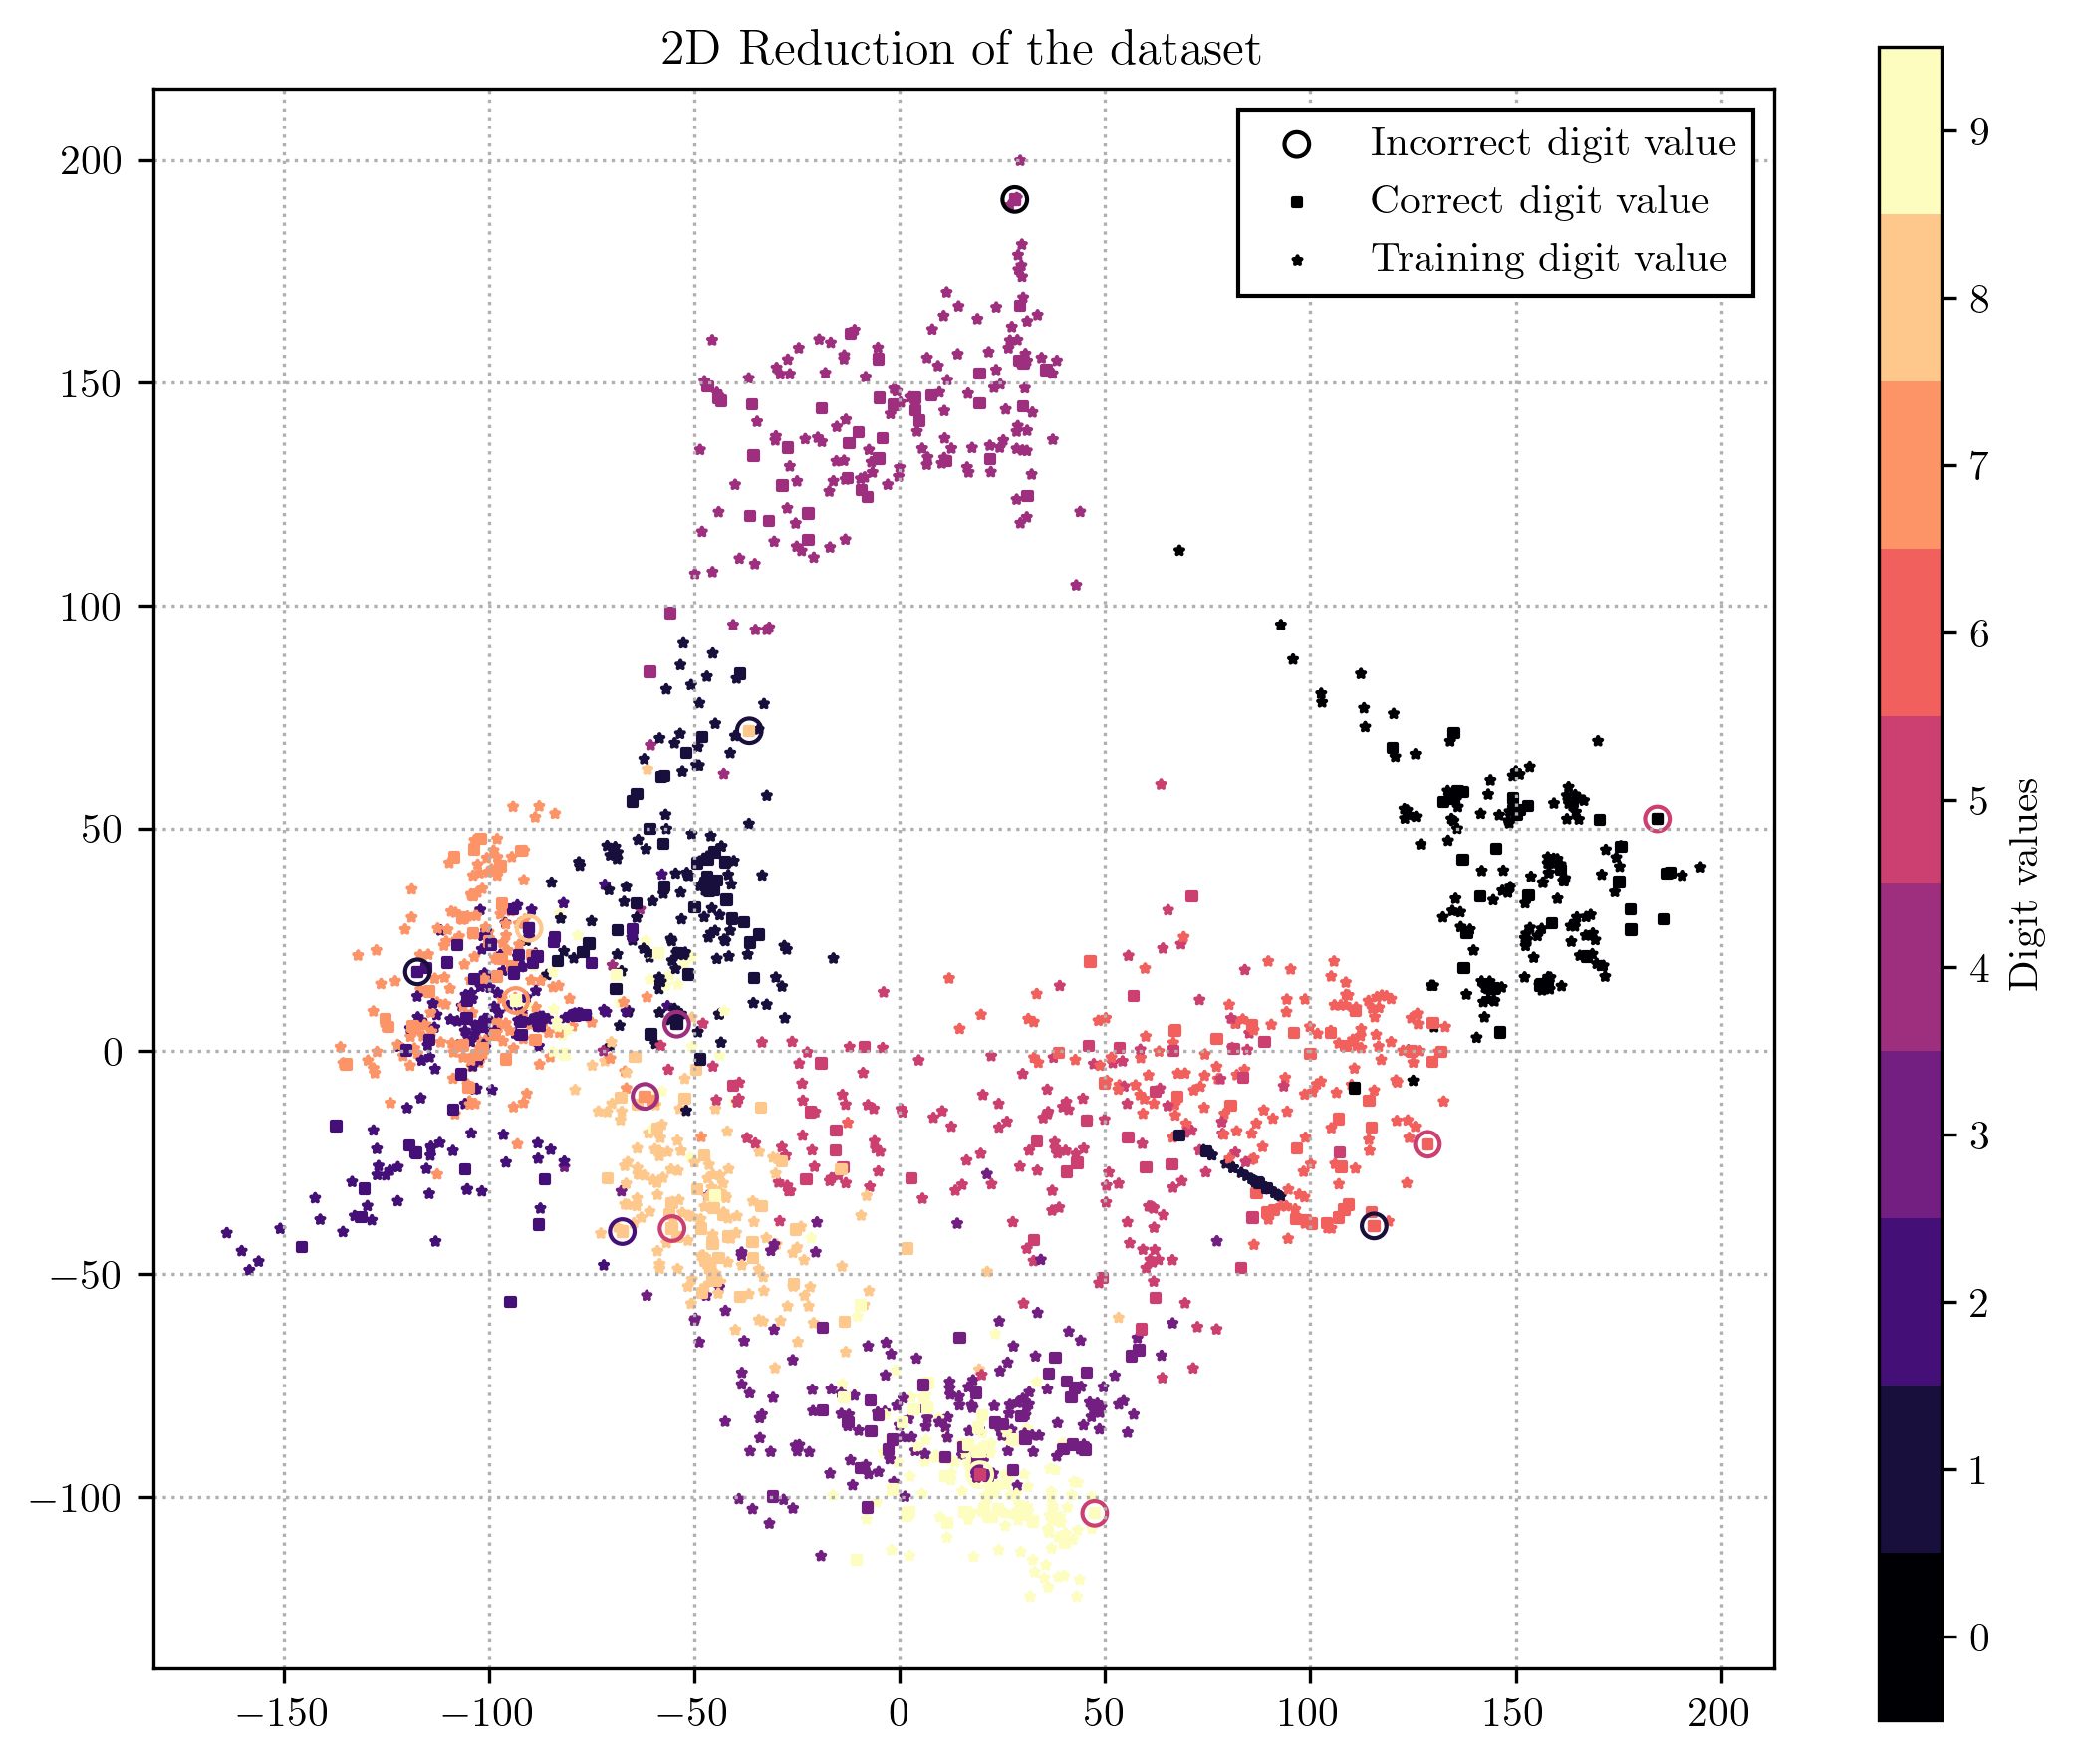

In [180]:
# Let's find exactly which points were wrong:

# Plot the D=2 reduction of the D=64 dataset
# Note: to emphasize clusters, the TRUE values of the digits have been used

fig , ax = plt.subplots(figsize=(7,7))

# let'saa build a discrete colormap
cmap_1   = mpl.cm.magma
cmapl_1  = [cmap_1(i) for i in range(cmap_1.N)]
cmap_1   = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmapl_1, cmap_1.N)
bounds_1 = np.linspace(-0.5, 9.5, 11)
ticks_1  = np.linspace(0., 9., 10)
norm_1   = mpl.colors.BoundaryNorm(bounds_1, cmap_1.N)

X_train  = embedding.transform( x_train )
X_test   = embedding.transform( x_test  )
    
leplot   = ax.scatter( X_train[:,0], X_train[:,1], c=y_train, marker='*', s=4, cmap=cmap_1, norm=norm_1)
letest   = ax.scatter( X_test[:,0], X_test[:,1], c=y_test, marker='s', s=4, cmap=cmap_1, norm=norm_1)

cmapax   = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cbar     = mpl.colorbar.ColorbarBase(cmapax, cmap=cmap_1, norm=norm_1, spacing='proportional', ticks=ticks_1, boundaries=bounds_1, format='%1i') # %.1f

ax.set_title('2D Reduction of the dataset')
cmapax.set_ylabel('Digit values') # 'A discrete custom colorbar'

ax.grid(linestyle=':')

n_wrong = np.sum(y_pred != y_test)
x_wrong = embedding.transform( x_test[ y_pred != y_test ]  ) 
y_wrong = y_pred[ y_pred != y_test ]
y_truee = y_test[ y_pred != y_test ]

for i in range(n_wrong):
    print("True digit  {:d}  confused with  {:d}".format(y_truee[i], y_wrong[i]))

print(y_wrong)

c_wrong = []
for w in y_wrong:
    c_wrong.append( to_hex(cmap_1(norm_1(w))) )

    
ax.scatter( x_wrong[:,0], x_wrong[:,1], c=y_truee[:], marker='s', s=4, cmap=cmap_1, norm=norm_1)
lewrong = ax.scatter( x_wrong[:,0], x_wrong[:,1], marker='o', s=35, facecolors='none', edgecolors=c_wrong[:], cmap=cmap_1, norm=norm_1)

ax.scatter([], [], marker='o', s=35, facecolors='none', edgecolors='black', label='Incorrect digit value')
ax.scatter([], [], marker='s', s=4, c='black', label='Correct digit value')
ax.scatter([], [], marker='*', s=4, c='black', label='Training digit value')


ax.legend(frameon=True, framealpha=1, fancybox=False, edgecolor='black')

'''
ax.scatter( [0], [1], s=100, c=4 )            # right colour --> purple
ax.scatter( [0], [25], s=100, c=norm_1(4) )    # right colour --> purple
ax.scatter( [0], [50], s=100, c=cmap_1(4) )   # black --> no
ax.scatter( [0], [100], s=100, c=cmap_1(norm_1(4)) )    # wrong colour --> light purple
ax.scatter( [0], [0], s=100, edgecolors='#9e2f7f', facecolors='none') #ok: c=norm_1(y_wrong[4])
'''

fig.savefig('./L13_images/L13_Fail_Weight_3.pdf', bbox_inches='tight')


